`Alexei Raiu (#207330006)`

# 3. Exam 3 - Image Metrics.

## Basic Image Metrics.

Basic image metrics: dimensions, min, max values.

Dimensions: 1280x720
Shape of the image: (720, 1280)
Max RGB value: 255
Min RGB value: 0


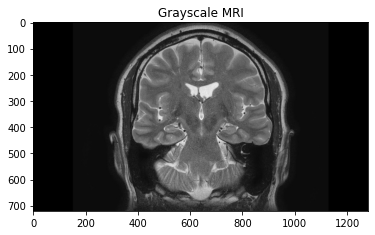

In [95]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = cv2.imread('mri.jpg', 0)
plt.figure()
plt.title('Grayscale MRI')
plt.imshow(img, cmap="gray")
print('Dimensions: {}x{}'.format(img.shape[1], img.shape[0]))
print('Shape of the image: {}'.format(img.shape))
print('Max RGB value: {}'.format(img.max()))
print('Min RGB value: {}'.format(img.min()))

## Histogram and CDF.

**Histogram** - dynamic range. How values are spread by the numbers.
**CDF** - cumulative distribution function - how each value adds to the whole amount
 of data.

Here we can see that the dynamic range is shifted into the grays, whites are
missing. There is a big spike in blacks and grays - due to the black padding and
dark-gray background.

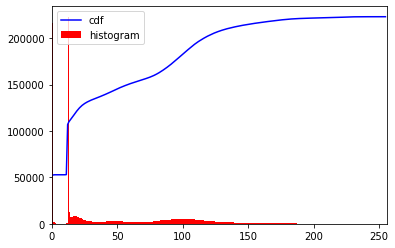

In [96]:
plt.figure()
hist, bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## EXIF Information

EXIF information is the standard information about an image, provided by the
capturing device and edited by the image editing software.

To read EXIF data, we use the `Pillow` library.

NOTE: Many medical image don't have any EXIF metadata attached to them.

In [97]:
from PIL import Image
from PIL.ExifTags import TAGS

image = Image.open('mri.jpg')
exifdata = image.getexif()
for tag_id in exifdata:
    tag = TAGS.get(tag_id, tag_id)
    data = exifdata.get(tag_id)
    # decode bytes
    if isinstance(data, bytes):
        data = data.decode()
    print(f"{tag:25}: {data}")

ResolutionUnit           : 2
ExifOffset               : 148
Software                 : GIMP 2.10.24
Orientation              : 1
DateTime                 : 2021:09:10 17:49:56
XResolution              : 300.0
YResolution              : 300.0


## ImageMagick

`ImageMagick` is one of the most complete image handling libraries.

Sadly, ImageMagick is a C/C++ library, and it has very poor binding to Python.

However, it can be used to obtain image information via command shell, and then
this information can be parsed out of it.

This output has lots of embedded and computed values, such as geometry, type,
depth, per-channel statistics, as well as image statistics, such as min, max,
mean, standard deviation, skewness, entropy, and many more.

The output is a text printed in console. We will later print it, and extract the
information we need from it. For now, we store it in an array.

In [98]:
import subprocess
import re

def extract_val(name, text):
    try:
        found = re.search(str(name) + ':(.*)', text, re.I).group(1)
    except AttributeError:
        found = ''
    return found

p = subprocess.Popen('identify -verbose mri.jpg', shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
data = []
total = ''
for line in p.stdout.readlines():
    tmpstr = line.decode().replace("\n", "")
    if len(tmpstr) > 5:
        data.append(tmpstr)

Here we extract some information by the keys that we specify in an array with a
custom function `extract_val(name, text)` parsing the output:

In [99]:
whole_text = "\n".join(data)
extract_vals = ('Format', 'Mime type', 'Colorspace', 'Type', 'Depth', 'Rendering intent', 'Gamma', 'Orientation', 'Mean', 'Standard deviation', 'Skewness', 'Entropy')
for key in extract_vals:
    print(f"{key:20}: {extract_val(key, whole_text)}")

Format              :  JPEG (Joint Photographic Experts Group JFIF format)
Mime type           :  image/jpeg
Colorspace          :  sRGB
Type                :  image/jpeg
Depth               :  8-bit
Rendering intent    :  Perceptual
Gamma               :  0.454545
Orientation         :  TopLeft
Mean                :  44.1981 (0.173326)
Standard deviation  :  50.161 (0.19671)
Skewness            :  1.09097
Entropy             :  0.655877


Here is the whole data output, with more information that can be extracted if
needed:

In [100]:
for line in data:
    print(line)

Image: mri.jpg
  Format: JPEG (Joint Photographic Experts Group JFIF format)
  Mime type: image/jpeg
  Class: DirectClass
  Geometry: 1280x720+0+0
  Resolution: 300x300
  Print size: 4.26667x2.4
  Units: PixelsPerInch
  Colorspace: sRGB
  Type: Grayscale
  Base type: Undefined
  Endianess: Undefined
  Depth: 8-bit
  Channel depth:
    red: 8-bit
    green: 8-bit
    blue: 8-bit
  Channel statistics:
    Pixels: 921600
    Red:
      min: 0  (0)
      max: 255 (1)
      mean: 44.1981 (0.173326)
      standard deviation: 50.161 (0.19671)
      kurtosis: 0.243828
      skewness: 1.09097
      entropy: 0.655877
    Green:
      min: 0  (0)
      max: 255 (1)
      mean: 44.1981 (0.173326)
      standard deviation: 50.161 (0.19671)
      kurtosis: 0.243828
      skewness: 1.09097
      entropy: 0.655877
    Blue:
      min: 0  (0)
      max: 255 (1)
      mean: 44.1981 (0.173326)
      standard deviation: 50.161 (0.19671)
      kurtosis: 0.243828
      skewness: 1.09097
      entropy: 0.655